**Problem Statement:**

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Loan Prediction.csv to Loan Prediction.csv


In [0]:
import pandas as pd
import io
train = pd.read_csv(io.BytesIO(uploaded['Loan Prediction.csv']))

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape

(614, 13)

In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


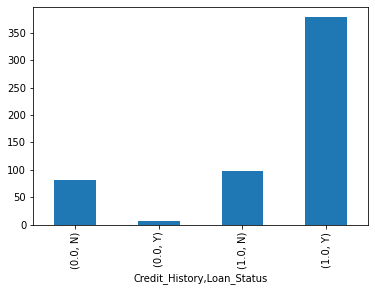

In [9]:
train.groupby(['Credit_History','Loan_Status']).size().plot(kind='bar')

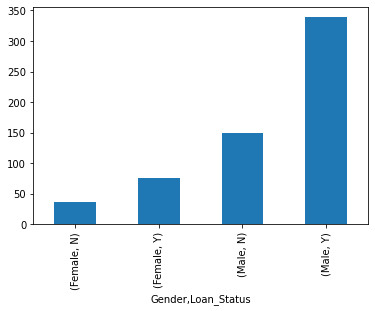

In [10]:
train.groupby(['Gender','Loan_Status']).size().plot(kind='bar')

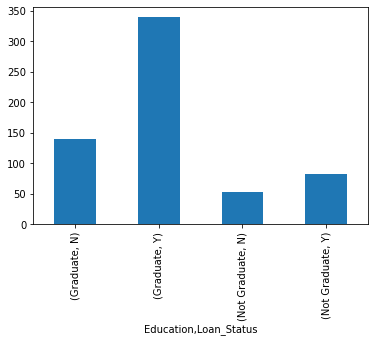

In [11]:
train.groupby(['Education','Loan_Status']).size().plot(kind='bar')

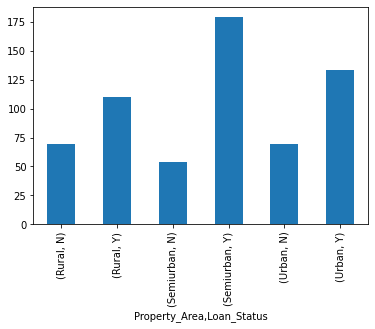

In [12]:
train.groupby(['Property_Area','Loan_Status']).size().plot(kind='bar')

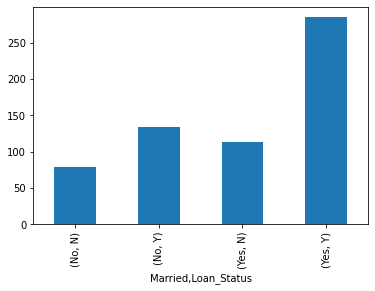

In [13]:
train.groupby(['Married','Loan_Status']).size().plot(kind='bar')

In [14]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
train['Married'].fillna('',inplace=True)

In [0]:
train['Gender'].fillna('',inplace=True)

In [0]:
train['Dependents'].fillna(-1,inplace=True)

In [0]:
train['Self_Employed'].fillna('',inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


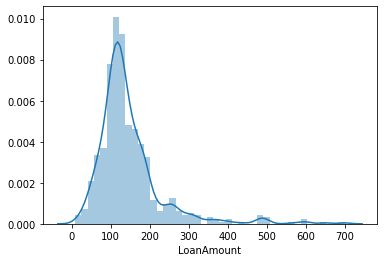

In [22]:
import seaborn as sns
sns.distplot(train['LoanAmount'])

In [23]:
train['LoanAmount'].mean()

146.41216216216216

In [24]:
train['LoanAmount'].median()

128.0

In [0]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [26]:
train['Credit_History'].isnull().sum()

50

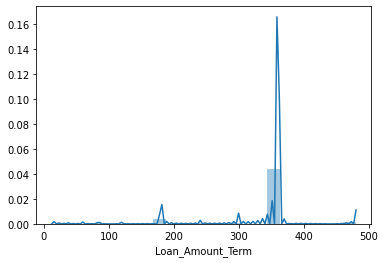

In [27]:
sns.distplot(train['Loan_Amount_Term'])

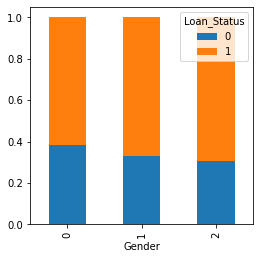

In [76]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

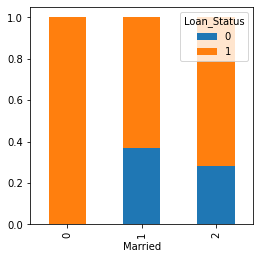

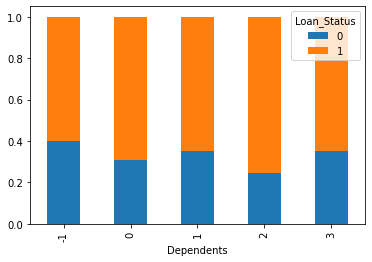

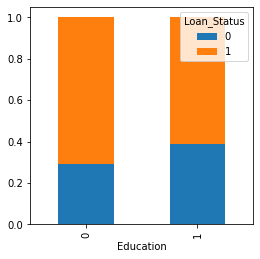

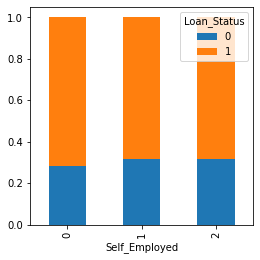

In [79]:
import matplotlib.pyplot as plt

Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

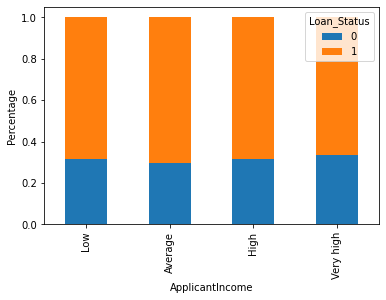

In [81]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

In [28]:
train['Loan_Amount_Term'].mean(),train['Loan_Amount_Term'].median(),train['Loan_Amount_Term'].mode()

(342.0, 360.0, 0    360.0
 dtype: float64)

In [0]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)

In [30]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train.shape

(614, 13)

In [32]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [0]:
train.drop('Loan_ID',axis=1,inplace=True)

In [34]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
-1     15
Name: Dependents, dtype: int64

In [0]:
train['Dependents'] = train['Dependents'].astype(str)
train['Dependents'] = [x.strip('+') for x in train['Dependents']]
train['Dependents'] = train['Dependents'].astype(int)

In [0]:
columns = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train[columns] = train[columns].apply(le.fit_transform)

In [38]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


In [0]:
X=[]
X = train.loc[:, train.columns != 'Loan_Status']
Y = []
Y = train['Loan_Status']

In [40]:
X['Credit_History'].fillna(-1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(random_state=96)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = 1)

In [42]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [43]:
X_train['Credit_History'].isnull().sum()

0

In [44]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=96, splitter='best')

In [45]:
y_pred = clf.predict(X_test)

print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.6864864864864865


In [46]:
clf.score(X_train,y_train)

1.0

In [47]:
clf.score(X_test,y_test)

0.6864864864864865

In [48]:
from sklearn.metrics import confusion_matrix

cf= confusion_matrix(y_test,y_pred)
print(cf)

[[32 29]
 [29 95]]


In [49]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

#creating a random forest instance
clf1 = RandomForestClassifier(random_state=96,max_depth=5,criterion='gini')

#train the model
clf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [50]:
y_pred1 = clf1.predict(X_test)

print('Accuracy :',accuracy_score(y_test,y_pred1))

Accuracy : 0.7891891891891892


In [51]:
cf1= confusion_matrix(y_test,y_pred1)
print(cf1)

[[ 25  36]
 [  3 121]]


In [52]:
#feature importance against each variable
pd.Series(clf1.feature_importances_, index=X_train.columns)

Gender               0.017785
Married              0.014213
Dependents           0.039384
Education            0.021967
Self_Employed        0.015276
ApplicantIncome      0.126797
CoapplicantIncome    0.082230
LoanAmount           0.112200
Loan_Amount_Term     0.071803
Credit_History       0.453645
Property_Area        0.044699
dtype: float64

In [53]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred2 = logreg.predict(X_test)

print('Accuracy :',accuracy_score(y_test,y_pred2))

Accuracy : 0.6648648648648648


In [70]:
#Importing XGBM Classifier 
from xgboost import XGBClassifier
#creating an extreme Gradient boosting instance
clf3 = XGBClassifier(random_state=96)

#training the model
clf3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
#calculating score on training data
clf3.score(X_train,y_train)

0.8811188811188811

In [72]:
#calculating score on test data
clf3.score(X_test,y_test)

0.772972972972973

In [73]:
#Importing AdaBoost Classifier 
from sklearn.ensemble import AdaBoostClassifier
#creating an AdaBoost instance
clf4 = AdaBoostClassifier(random_state=96)

#training the model
clf4.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=96)

In [74]:
#calculating score on training data
clf4.score(X_train,y_train)

0.8578088578088578

In [75]:
#calculating score on test data
clf4.score(X_test,y_test)

0.7567567567567568

In [0]:
from sklearn.model_selection import StratifiedKFold

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) for train_index,test_index in kf.split(X,y):     print('\n{} of kfold {}'.format(i,kf.n_splits))    
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = LogisticRegression(random_state=1)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 pred_test = model.predict(test) pred=model.predict_proba(xvl)[:,1]

In [0]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()